In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
import random

In [3]:
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions

In [4]:
class line:
    
    def __init__(self, canvas, thickness=3, color=(0,0,0)):
        self.type = "line"
        self.p1 = (random.randint(0, canvas.shape[0]), random.randint(0, canvas.shape[1]))
        self.p2 = (random.randint(0, canvas.shape[0]), random.randint(0, canvas.shape[1]))
        self.thickness  = thickness
        self.color = color
        
    def draw_on(self, canvas):
        return cv2.line(canvas, self.p1, self.p2, self.color, self.thickness) 
        
class circle:
    
    def __init__(self, canvas, thickness=-1, color=(0,0,0), radius=-1):
        self.type = "circle"
        self.center = (random.randint(0, canvas.shape[0]), random.randint(0, canvas.shape[1]))
        self.radius = radius
        if self.radius==-1:
            self.radius = random.randint(10, canvas.shape[0]//2)
        self.thickness  = thickness
        self.color = color
   
    def draw_on(self, canvas):
        return cv2.circle(canvas, self.center, self.radius, self.color, self.thickness)
    
class arc:
    
    def __init__(self, canvas, thickness=-1, color=(0,0,0)):
        self.type = "circle"
        
        padding = 40
        
        self.center      = (random.randint(padding, canvas.shape[0]-padding), random.randint(padding, canvas.shape[0]-padding))
        self.radius1     = random.randint(20, 20+canvas.shape[0]-self.center[0])
        self.radius2     = random.randint(20, 20+canvas.shape[0]-self.center[1])
        self.angle       = random.randint(0, 360)
        self.start_angle = random.randint(0, 180)
        self.end_angle   = random.randint(self.start_angle+30, 360-30)
        self.thickness   = thickness
        self.color = color

    def draw_on(self, canvas):
        axes=(self.radius1, self.radius2)
        return cv2.ellipse(canvas, self.center, axes, self.angle, 
                           self.start_angle, self.end_angle, self.color, self.thickness)
    

class tableau:
    
    def __init__(self, shape, color=(255,255,255)):    
        self.canvas = np.ones((shape[0], shape[1], 3))*np.array(color)
        
    def display_with(self, entities):
        temp_canvas = np.copy(self.canvas)
        for entity in entities:
            temp_canvas = entity.draw_on(temp_canvas) 
        end_result = temp_canvas.astype(int)
        plt.imshow(end_result)
        return end_result

In [5]:
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')

#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')

#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

17227776/17225924 [==============================] - 7s 0us/step


In [6]:
def predict(image, model=vgg_model):
    
    if model.name == "resnet50" or model.name == "mobilenet_1.00_224":
        # prepare the image for the VGG model
        processed_image = image.copy()

    elif model.name == "vgg16":
        
        # prepare the image for the VGG model
        processed_image = vgg16.preprocess_input(image.copy())
        #processed_image = image_batch.copy()

    # get the predicted probabilities for each class
    predictions = model.predict(image)
    # print predictions
    
    labels = decode_predictions(predictions, top=-1)
    
    return labels

def get_label_value(canvas, desired_label, model=vgg_model):

        labels = predict(np.expand_dims(canvas, axis=0))

        labels_array = np.array(labels[0])[:,1:]
        labels_dic   = dict(zip(labels_array[:,0], labels_array[:,1]))
        label        = labels_dic[desired_label]
        
        return label

In [7]:
model = vgg_model

In [ ]:
bests = {}


ITERATION:0
1 digital_clock 	 0.3690009
2 whistle 	 0.1304444
3 jack-o'-lantern 	 0.13040632
4 digital_watch 	 0.02956357
5 hair_slide 	 0.02462554

ITERATION:1
1 envelope 	 0.38330144
2 hook 	 0.1996336
3 street_sign 	 0.06937691
4 Band_Aid 	 0.024969688
5 laptop 	 0.02429807

ITERATION:2
1 parachute 	 0.14163944
2 balloon 	 0.082972474
3 hair_slide 	 0.046756532
4 hook 	 0.041600123
5 envelope 	 0.02401298

ITERATION:3
1 hook 	 0.43596345
2 chain 	 0.059872072
3 hair_slide 	 0.055900928
4 knot 	 0.034915198
5 bib 	 0.026808092

ITERATION:4
1 laptop 	 0.28974968
2 notebook 	 0.14491774
3 iPod 	 0.100832924
4 jigsaw_puzzle 	 0.056780677
5 envelope 	 0.047591053

ITERATION:5
1 hook 	 0.114932746
2 nipple 	 0.08885766
3 parachute 	 0.053189307
4 Band_Aid 	 0.039249215
5 safety_pin 	 0.03905394

ITERATION:6
1 Band_Aid 	 0.11009393
2 jellyfish 	 0.09667656
3 envelope 	 0.060588405
4 hook 	 0.05050442
5 safety_pin 	 0.034338143

ITERATION:7
1 hook 	 0.43791085
2 parachute 	 0.123754956
3 s


ITERATION:63
1 jigsaw_puzzle 	 0.5635949
2 hook 	 0.08122932
3 envelope 	 0.06668634
4 safety_pin 	 0.0383941
5 bib 	 0.036538243

ITERATION:64
1 envelope 	 0.10844189
2 jellyfish 	 0.067070015
3 parachute 	 0.052084256
4 web_site 	 0.04968794
5 balloon 	 0.046674624

ITERATION:65
1 hook 	 0.2694159
2 nipple 	 0.07688292
3 Band_Aid 	 0.06800408
4 envelope 	 0.040684544
5 parachute 	 0.03734116

ITERATION:66
1 hook 	 0.3600918
2 bib 	 0.20990212
3 nematode 	 0.052886672
4 parachute 	 0.050169606
5 jigsaw_puzzle 	 0.049324203

ITERATION:67
1 rubber_eraser 	 0.07104457
2 Band_Aid 	 0.06522799
3 envelope 	 0.06287349
4 pill_bottle 	 0.04424006
5 digital_clock 	 0.0387932

ITERATION:68
1 nematode 	 0.5418293
2 knot 	 0.1804067
3 hook 	 0.12906693
4 coil 	 0.098950736
5 nail 	 0.009762456

ITERATION:69
1 bib 	 0.15807457
2 hair_slide 	 0.10591755
3 parachute 	 0.05445312
4 hook 	 0.052308705
5 nematode 	 0.026654208

ITERATION:70
1 Band_Aid 	 0.16671667
2 nipple 	 0.11003841
3 whistle 	 0.1


ITERATION:125
1 hook 	 0.5817547
2 nematode 	 0.091969915
3 parachute 	 0.060467392
4 flatworm 	 0.05550406
5 coral_fungus 	 0.012601381

ITERATION:126
1 Band_Aid 	 0.25668198
2 whistle 	 0.0772233
3 nipple 	 0.07330954
4 envelope 	 0.06291195
5 hair_slide 	 0.057020422

ITERATION:127
1 Band_Aid 	 0.2686935
2 rubber_eraser 	 0.136995
3 nipple 	 0.07422085
4 hair_slide 	 0.044339143
5 pill_bottle 	 0.040279165

ITERATION:128
1 hook 	 0.65758294
2 nematode 	 0.10829273
3 bib 	 0.042671334
4 chain 	 0.01945024
5 coil 	 0.00906592

ITERATION:129
1 envelope 	 0.16357452
2 Band_Aid 	 0.07096475
3 web_site 	 0.0689197
4 digital_clock 	 0.057457194
5 whistle 	 0.049815666

ITERATION:130
1 Band_Aid 	 0.3773887
2 envelope 	 0.11343362
3 web_site 	 0.10242158
4 laptop 	 0.039893806
5 pencil_box 	 0.030825384

ITERATION:131
1 cup 	 0.09085885
2 nipple 	 0.085664116
3 envelope 	 0.07732428
4 hook 	 0.04696254
5 hair_slide 	 0.03877006

ITERATION:132
1 hook 	 0.58424205
2 nematode 	 0.21124579
3 se


ITERATION:187
1 envelope 	 0.46908697
2 Band_Aid 	 0.28134122
3 pinwheel 	 0.015009229
4 web_site 	 0.014613973
5 laptop 	 0.013787916

ITERATION:188
1 hook 	 0.124913126
2 nipple 	 0.10999224
3 nematode 	 0.06704021
4 whistle 	 0.050043717
5 safety_pin 	 0.049041655

ITERATION:189
1 pinwheel 	 0.2639907
2 hook 	 0.076153085
3 Band_Aid 	 0.06685009
4 envelope 	 0.062271364
5 nipple 	 0.04794558

ITERATION:190
1 pillow 	 0.10432449
2 envelope 	 0.087497644
3 Band_Aid 	 0.06505635
4 jigsaw_puzzle 	 0.05528877
5 laptop 	 0.04684048

ITERATION:191
1 Band_Aid 	 0.11909645
2 bib 	 0.083983146
3 laptop 	 0.055621043
4 pinwheel 	 0.048947357
5 envelope 	 0.047288682

ITERATION:192
1 Band_Aid 	 0.21266533
2 street_sign 	 0.09814269
3 laptop 	 0.0900735
4 envelope 	 0.04860204
5 pinwheel 	 0.036953084

ITERATION:193
1 nematode 	 0.38666102
2 whistle 	 0.09205115
3 hook 	 0.0714293
4 nipple 	 0.03879501
5 digital_clock 	 0.032988306

ITERATION:194
1 Band_Aid 	 0.17298387
2 envelope 	 0.1701056
3

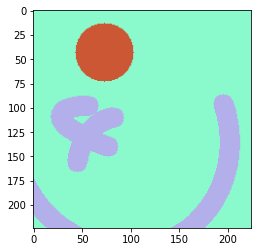

In [53]:
for j in range(200):

    entities = []
    
    color0 = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
    color1 = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
    color2 = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
    color3 = (random.randint(0,255), random.randint(0,255), random.randint(0,255))

    tableau1 = tableau([224,224], color=color0)

    entities.append(circle(tableau1.canvas, radius=30, thickness=-1, color=color3))

    entities.append(arc(tableau1.canvas, thickness=20, color=color1))
    entities.append(arc(tableau1.canvas, thickness=20, color=color1))
    entities.append(arc(tableau1.canvas, thickness=20, color=color1))


    labels = predict(np.expand_dims(tableau1.display_with(entities), 0), model)
    labels_array = np.array(labels[0])[:,1:]
    labels_dic   = dict(zip(labels_array[:,0], labels_array[:,1]))

    print("\nITERATION:{}".format(j))
    
    for i, (label, value) in list(enumerate(labels_dic.items()))[:5]:
        print(i+1, label, "\t", value)
        
    top_prediction = list(labels_dic.keys())[0]
    
    if (top_prediction not in bests) or (bests[top_prediction][0] < float(labels_dic[top_prediction])):
        bests[top_prediction] = (float(labels_dic[top_prediction]), tableau1.display_with(entities))

In [61]:
confident_results = sorted(list(zip(bests.keys(), np.array(list(bests.values()))[:, 0])), key=lambda x: -x[1])
confident_results[:20]

<ipython-input-61-41590f4d39e0>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  confident_results = sorted(list(zip(bests.keys(), np.array(list(bests.values()))[:, 0])), key=lambda x: -x[1])


[('bib', 0.9953029),
 ('hook', 0.9548657),
 ('jellyfish', 0.9182674),
 ('Band_Aid', 0.85267067),
 ('hair_slide', 0.84031886),
 ('jigsaw_puzzle', 0.7779029),
 ('maze', 0.760955),
 ("jack-o'-lantern", 0.72620136),
 ('nipple', 0.7221339),
 ('cup', 0.71811795),
 ('parachute', 0.6981415),
 ('pinwheel', 0.6678913),
 ('digital_clock', 0.65796906),
 ('envelope', 0.61936146),
 ('nematode', 0.576676),
 ('coil', 0.5649921),
 ('whistle', 0.55546886),
 ('knot', 0.5195615),
 ('paper_towel', 0.43439344),
 ('rugby_ball', 0.43378028)]

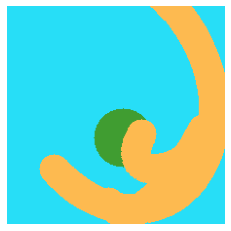

In [65]:
for key, value in confident_results:
    plt.imshow(bests[key][1])
    plt.axis('off')
    plt.savefig(f"results/{key}_{int(value*100)}.png", bbox_inches='tight')

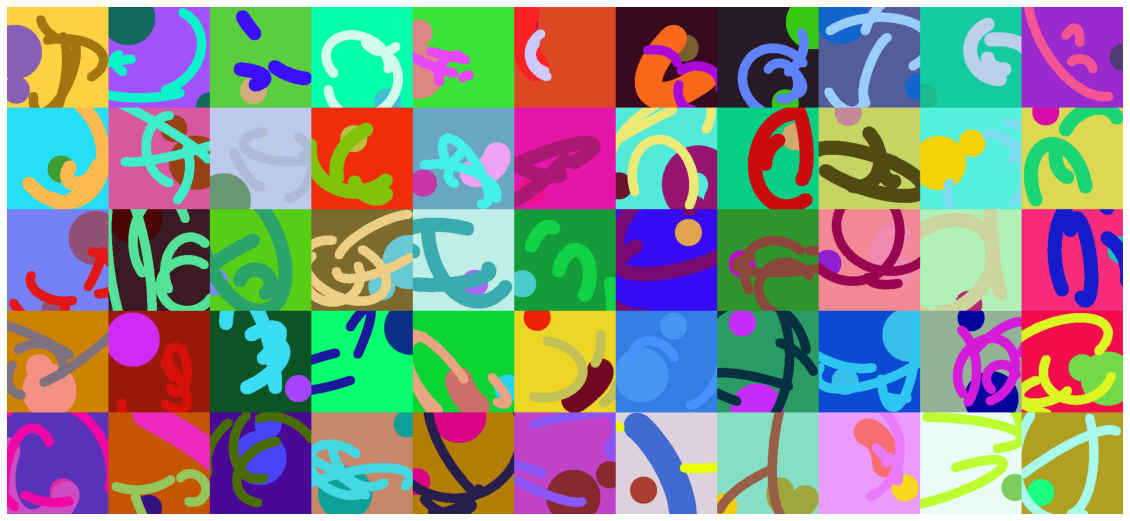

In [95]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 40

all_imgs = np.array([bests[key][1] for key in bests])

all_imgs_rows = [row for row in all_imgs[:55].reshape((5, 11, 224, 224, 3))]

all_imgs_cols = [np.hstack(row) for row in all_imgs_rows]

all_imgs_table = np.vstack(all_imgs_cols)

plt.imshow(all_imgs_table)
plt.axis('off')
plt.savefig(f"results/collage.png", bbox_inches='tight')